# Project I

In this project, as a data scientist, I will clean the data, do an indepth analysis and come up with an expansion country for an EdTech client. 

Problem:  The client is not sure which country to expand their business to. 


We have tons of indicators to consider while our analysis. But, we in this analysis we consider some of them. 

In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First let's read the main datasets 

In [2]:
data = pd.read_csv("D:/Think-it repository/New folder/datasets/EdStatsData.csv")

In [3]:
data_country = pd.read_csv("D:/Think-it repository/New folder/datasets/EdStatsCountry.csv")

Then let's have a look into these datasets

In [8]:
data.shape

(886930, 70)

In [4]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above dataframe we can see there are a lot of null values. Let's further explore

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

When we check data completness, almost every column is empty. We have a total of 886930 entries and almost all of the columns have less than 10% of thier entries are non null. the year 2010 is the most complete. 

We can see that we have 3665 unique indicators. Let's evaluate the completness of those columns for the indicators that are relevant to our problem.

In [19]:
data['Indicator Code'].value_counts()

HH.MICS.SCR.Q2              242
LO.TIMSS.SCI8.P75           242
HH.MICS.SCR.F               242
SP.POP.AG11.TO.UN           242
UIS.LR.AG25T64.M            242
                           ... 
UIS.DR.2.GPV.G1.T           242
LO.EGRA.INIT.0.CHC.4GRD     242
UIS.EA.7T8.AG25T99.GPI      242
BAR.PRM.ICMP.75UP.ZS        242
UIS.AFR.PBR.1.G4.PU.MATH    242
Name: Indicator Code, Length: 3665, dtype: int64

In [20]:
data.groupby('Indicator Code').count()

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.1519.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.15UP.FE.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.15UP.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.2024.FE.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UIS.XUNIT.USCONST.3.FSGOV,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UIS.XUNIT.USCONST.4.FSGOV,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UIS.XUNIT.USCONST.56.FSGOV,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we can have a look at countries dataset informaton 

In [21]:
data_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [22]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Let's create a dataframe from the relevant columns for our analysis: country_code, name, region and income_group. 

And save the dataframe as countries_income.csv

In [24]:
countries_income = data_country["Country Code"].unique()
countries_income = pd.DataFrame({"Country_Code" : data_country["Country Code"].unique(), "Name" : data_country["Short Name"], "Region" : data_country["Region"], "Income_group" : data_country["Income Group"]})
countries_income.to_csv("countries_income.csv")


countries_income.head()


,Country_Code,Name,Region,Income_group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD


Let's count how many countries are in the data

In [26]:
data['Country Name'].describe()

count       886930
unique         242
top       Pakistan
freq          3665
Name: Country Name, dtype: object

Now, let's create a datframe containing only countries


In [27]:
countries = data["Country Name"].unique()
countries = pd.DataFrame({"Country Name" : data["Country Name"].unique()})
countries.to_csv("countries.csv")
print(countries)

                                    Country Name
0                                     Arab World
1                            East Asia & Pacific
2    East Asia & Pacific (excluding high income)
3                                      Euro area
4                          Europe & Central Asia
..                                           ...
237                        Virgin Islands (U.S.)
238                           West Bank and Gaza
239                                  Yemen, Rep.
240                                       Zambia
241                                     Zimbabwe

[242 rows x 1 columns]


Now, let's merge countries_income extracted from country_data to the data 

In [28]:
data_plus_country = pd.merge(data,countries_income, left_on='Country Code', right_on='Country_Code')
data_plus_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2080,2085,2090,2095,2100,Unnamed: 69,Country_Code,Name,Region,Income_group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN


In [29]:
data_plus_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Data columns (total 74 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    883265 non-null  object 
 1   Country Code    883265 non-null  object 
 2   Indicator Name  883265 non-null  object 
 3   Indicator Code  883265 non-null  object 
 4   1970            72278 non-null   float64
 5   1971            35508 non-null   float64
 6   1972            35594 non-null   float64
 7   1973            35514 non-null   float64
 8   1974            35708 non-null   float64
 9   1975            87268 non-null   float64
 10  1976            37445 non-null   float64
 11  1977            37562 non-null   float64
 12  1978            37564 non-null   float64
 13  1979            36771 non-null   float64
 14  1980            89109 non-null   float64
 15  1981            38738 non-null   float64
 16  1982            37504 non-null   float64
 17  1983      

Lets choose columns which are interesting and have better number of non-null values. Based on that, we choose 2010, 2015, 2010, and for future projections 2025 and 2030. 

So, we filter the selected columns.

In [30]:
data_column_reduced = data_plus_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 'Indicator Name', 'Indicator Code', '2010', '2015', '2025','2030'])
data_column_reduced.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015,2025,2030
0,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN
1,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN
2,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN
3,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN
4,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,NaN,NaN,NaN


In [31]:
data_column_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          784310 non-null  object 
 1   Country Name    883265 non-null  object 
 2   Country Code    883265 non-null  object 
 3   Income_group    784310 non-null  object 
 4   Indicator Name  883265 non-null  object 
 5   Indicator Code  883265 non-null  object 
 6   2010            242382 non-null  float64
 7   2015            130966 non-null  float64
 8   2025            51436 non-null   float64
 9   2030            51436 non-null   float64
dtypes: float64(4), object(6)
memory usage: 74.1+ MB


We remove data with no values in the income group 

In [35]:
data_column_reduced = data_column_reduced [data_column_reduced.Income_group.notnull()]
data_column_reduced

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015,2025,2030
91625,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN
91626,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN
91627,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN
91628,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN
91629,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
883260,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN
883261,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN
883262,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN
883263,Sub-Saharan Africa,Zimbabwe,ZWE,Low income,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN


In [36]:
data_column_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784310 entries, 91625 to 883264
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          784310 non-null  object 
 1   Country Name    784310 non-null  object 
 2   Country Code    784310 non-null  object 
 3   Income_group    784310 non-null  object 
 4   Indicator Name  784310 non-null  object 
 5   Indicator Code  784310 non-null  object 
 6   2010            233465 non-null  float64
 7   2015            129126 non-null  float64
 8   2025            51128 non-null   float64
 9   2030            51128 non-null   float64
dtypes: float64(4), object(6)
memory usage: 65.8+ MB


From the income group, we only select countries with an upper middle income and high income because countries with a better income have a high probability of having potential customers because their development in the digital sector.

In [37]:
data_column_reduced.Income_group.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [38]:
incomes_to_keep = ['Upper middle income', 'High income: nonOECD', 'High income: OECD']
data_reduced_income = data_column_reduced[data_column_reduced.Income_group.isin(incomes_to_keep)]
data_reduced_income.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015,2025,2030
95290,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN
95291,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN
95292,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN
95293,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN
95294,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,91.033867,NaN,NaN,NaN


In [39]:
data_reduced_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476450 entries, 95290 to 868604
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          476450 non-null  object 
 1   Country Name    476450 non-null  object 
 2   Country Code    476450 non-null  object 
 3   Income_group    476450 non-null  object 
 4   Indicator Name  476450 non-null  object 
 5   Indicator Code  476450 non-null  object 
 6   2010            136908 non-null  float64
 7   2015            77816 non-null   float64
 8   2025            29876 non-null   float64
 9   2030            29876 non-null   float64
dtypes: float64(4), object(6)
memory usage: 40.0+ MB


Now, it's time to select our indicators. The indicators we are more interested are internet users and personal computers as our client is an EdTech company. We extract those indicators by using indicator codes found as found in https://datatopics.worldbank.org/education/indicators 

In [40]:
data_reduced_internet = data_reduced_income.loc[(data_reduced_income['Indicator Code'] == "IT.NET.USER.P2") | (data_reduced_income['Indicator Code'] == "IT.CMP.PCMP.P2")] 
data_reduced_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015,2025,2030
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,45.0,63.252933,NaN,NaN
97374,Europe & Central Asia,Albania,ALB,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,12.5,38.200000,NaN,NaN
101039,Middle East & North Africa,Algeria,DZA,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN


In [41]:
data_reduced_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 96665 to 867024
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          260 non-null    object 
 1   Country Name    260 non-null    object 
 2   Country Code    260 non-null    object 
 3   Income_group    260 non-null    object 
 4   Indicator Name  260 non-null    object 
 5   Indicator Code  260 non-null    object 
 6   2010            120 non-null    float64
 7   2015            120 non-null    float64
 8   2025            0 non-null      float64
 9   2030            0 non-null      float64
dtypes: float64(4), object(6)
memory usage: 22.3+ KB


We have different indicators to consider in order to lang a sound expansion strategy for our client i.e. Internet and computer, demographics, and expenditure and economy for education.

We check the availability of data for the two indicators. In 2010 and 2015, we can see that we have 45% of the data to be non null. But in 2025 and 2030 we see all of our data is a null value so we we conclude that we don't have any projection. That said, we remove the columns, 2025 and 2030, and we filter out 2010 and 2015.

In [44]:
codes_to_keep = ['IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
data_reduced_itc = data_reduced_income[data_reduced_income['Indicator Code'].isin(codes_to_keep)]
data_reduced_itc.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015,2025,2030
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,45.0,63.252933,NaN,NaN
97374,Europe & Central Asia,Albania,ALB,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,12.5,38.200000,NaN,NaN
101039,Middle East & North Africa,Algeria,DZA,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN


In [45]:
data_reduced_itc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 96665 to 867024
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          260 non-null    object 
 1   Country Name    260 non-null    object 
 2   Country Code    260 non-null    object 
 3   Income_group    260 non-null    object 
 4   Indicator Name  260 non-null    object 
 5   Indicator Code  260 non-null    object 
 6   2010            120 non-null    float64
 7   2015            120 non-null    float64
 8   2025            0 non-null      float64
 9   2030            0 non-null      float64
dtypes: float64(4), object(6)
memory usage: 22.3+ KB


Let's remove the useless data

In [46]:
data_reduced_internet = data_reduced_internet.drop(['2025', '2030'], axis=1)
data_reduced_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,45.0,63.252933
97374,Europe & Central Asia,Albania,ALB,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,12.5,38.200000
101039,Middle East & North Africa,Algeria,DZA,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN


Let's also remove the null value for internet and computer in the year 2010 and 2015

In [47]:
data_reduced_internet = data_reduced_internet[data_reduced_internet['2010'].notnull() | 
                                              data_reduced_internet['2015'].notnull()]
data_reduced_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,45.0,63.252933
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,12.5,38.200000
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,81.0,96.910000
111325,Sub-Saharan Africa,Angola,AGO,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,2.8,12.400000
114990,Latin America & Caribbean,Antigua and Barbuda,ATG,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,47.0,70.000000


From the two indicators only one indicator has non null values

In [48]:
data_reduced_internet['Indicator Name'].unique()

array(['Internet users (per 100 people)'], dtype=object)

For the years, 2010 and 2015, we have similar number of data, 120. So we can only keep the one which is more close to 2021. In this case we keep 2015 and round it two floating decimal points. 

In [49]:
data_reduced_internet['2015'] = data_reduced_internet['2015'].round(1)
data_reduced_internet = data_reduced_internet.sort_values(by='2015', ascending=False)
data_reduced_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015
169965,North America,Bermuda,BMU,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,84.21,98.3
408190,Europe & Central Asia,Iceland,ISL,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,93.39,98.2
510810,Europe & Central Asia,Luxembourg,LUX,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,90.62,97.3
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,81.00,96.9
624425,Europe & Central Asia,Norway,NOR,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,93.39,96.8


Now, we can create a pivot table, country name and internet users as columns

In [50]:
pivotInternet = data_reduced_internet.pivot_table(index=['Country Name'], 
                                                  columns=['Indicator Name'], 
                                                  values= '2015')
print(pivotInternet)

Indicator Name         Internet users (per 100 people)
Country Name                                          
Albania                                           63.3
Algeria                                           38.2
Andorra                                           96.9
Angola                                            12.4
Antigua and Barbuda                               70.0
...                                                ...
United Kingdom                                    92.0
United States                                     74.6
Uruguay                                           64.6
Venezuela, RB                                     61.9
Virgin Islands (U.S.)                             54.8

[120 rows x 1 columns]


Text(0.5, 1.0, 'Internet users in countries')

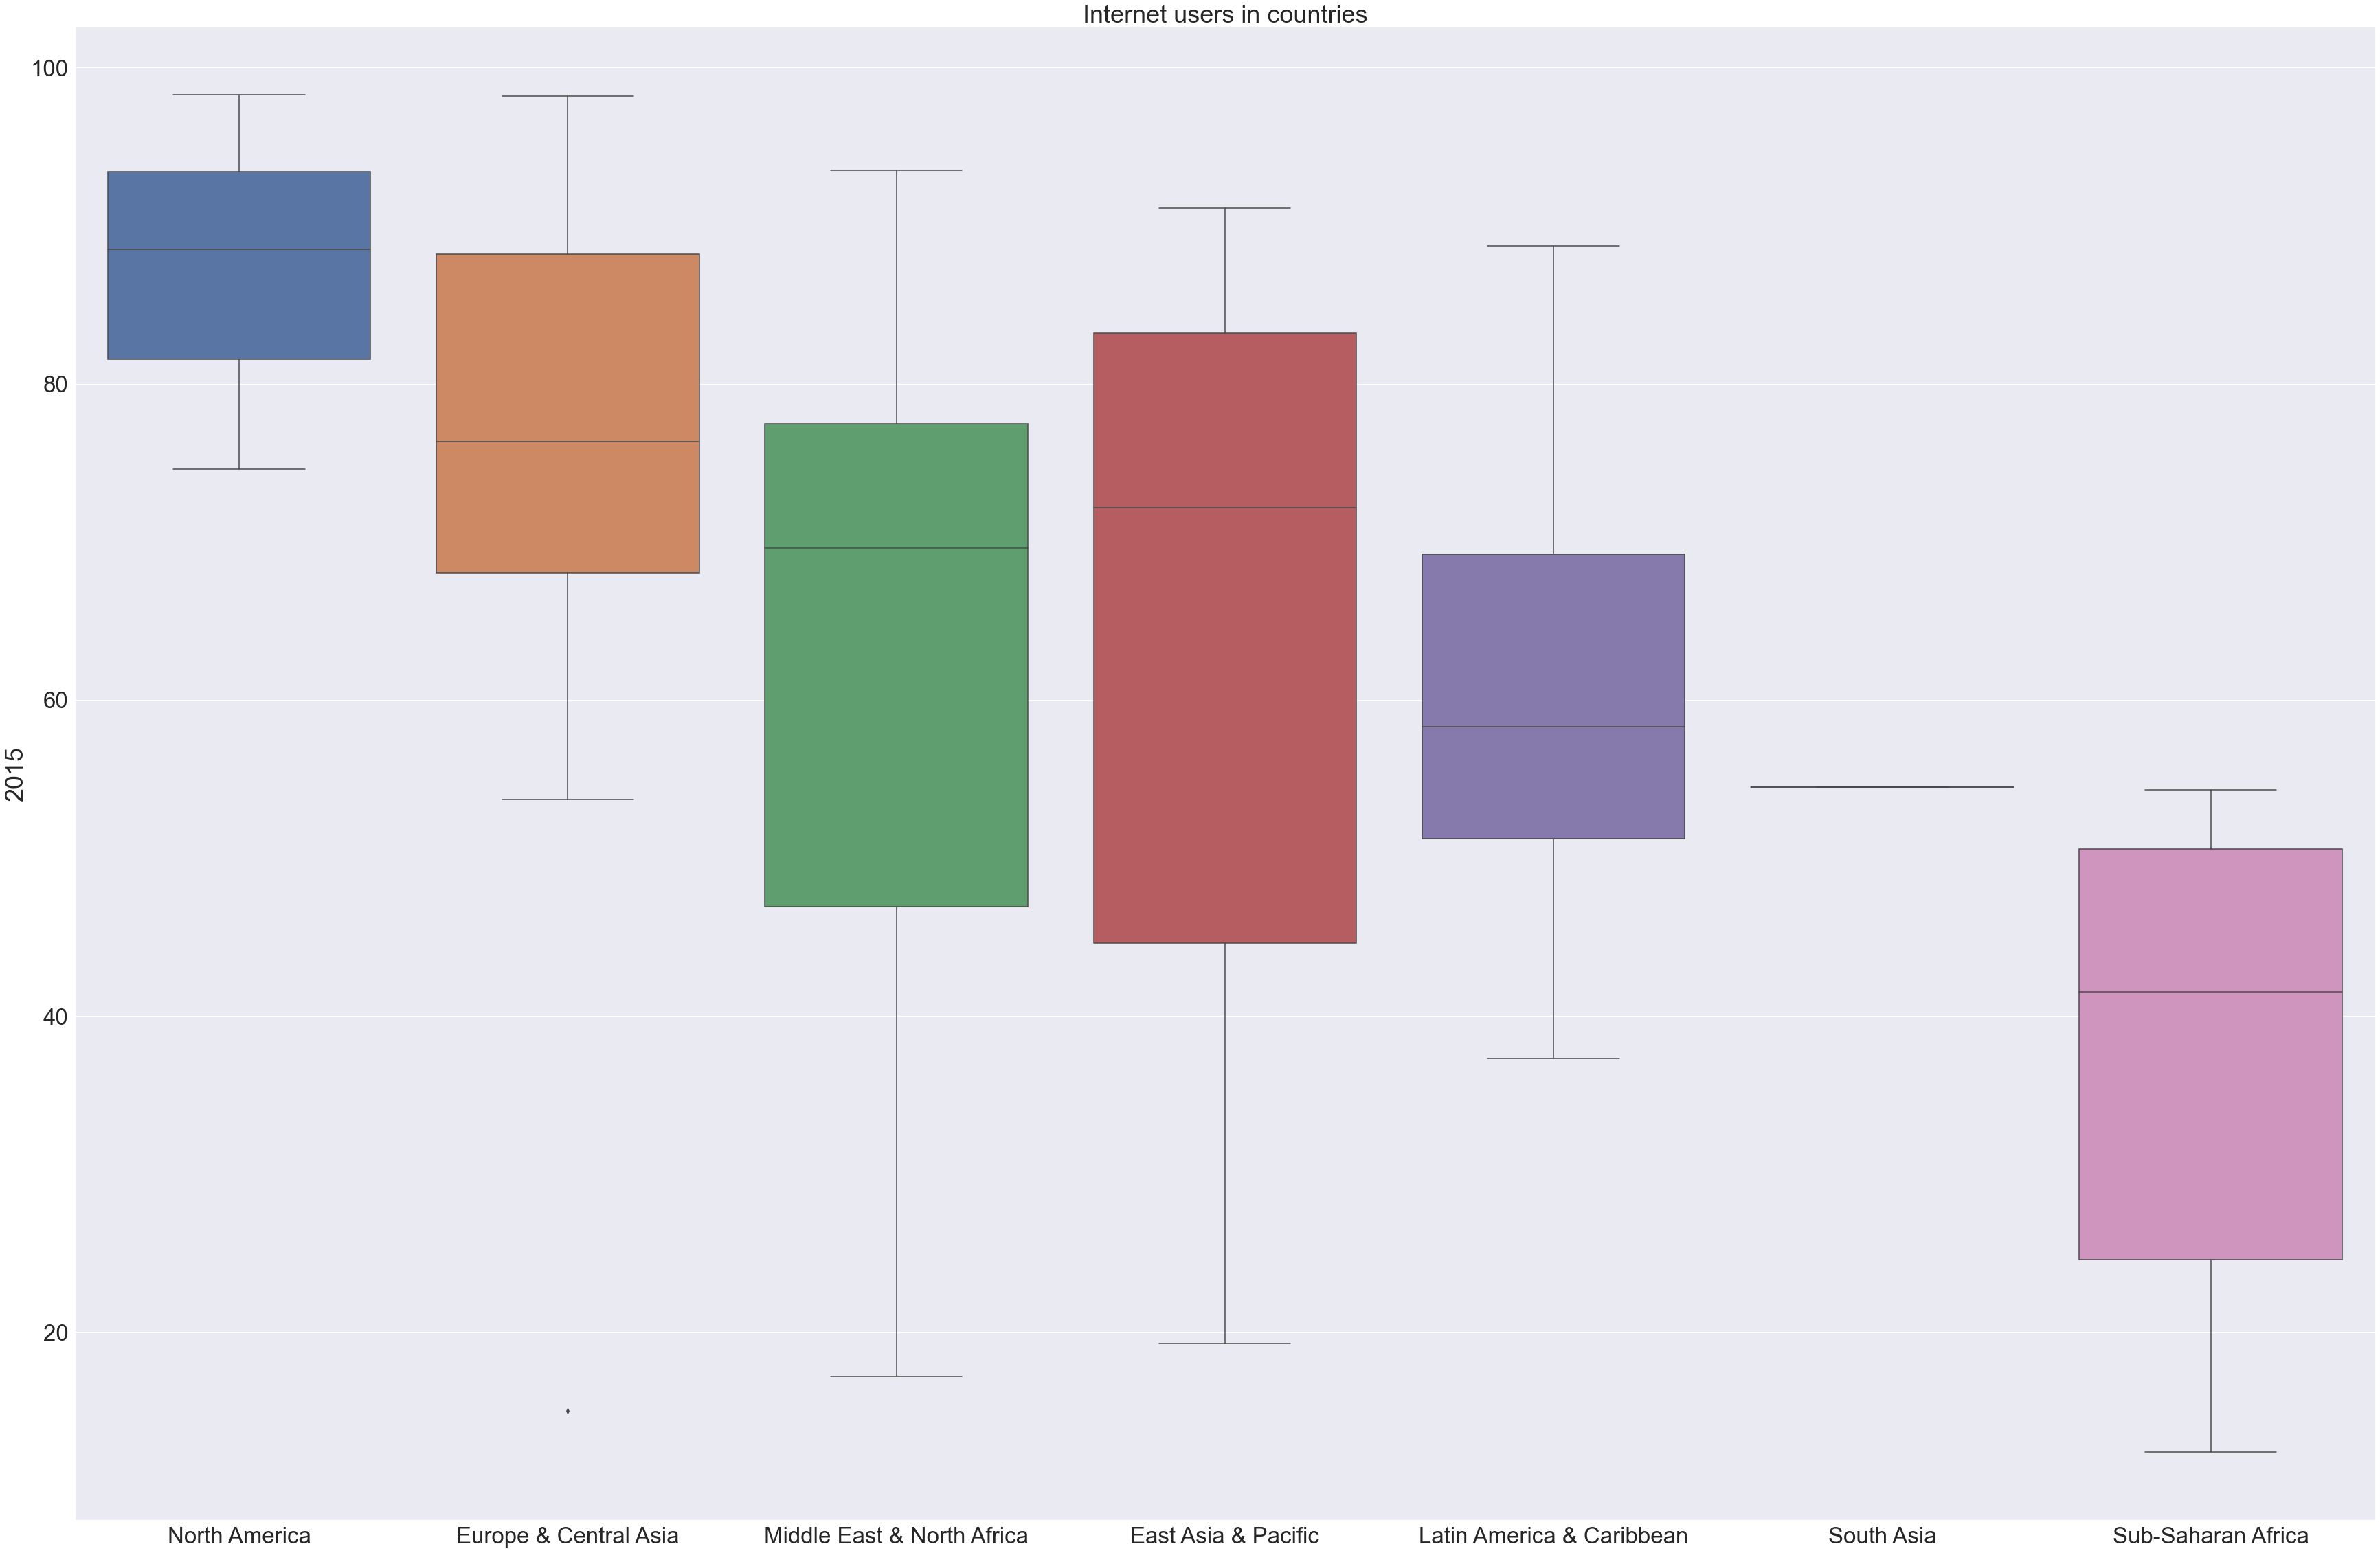

In [84]:
sns.set(font_scale=3)
plt.figure(figsize=(60, 40))
sns.boxplot(data=data_reduced_internet, x="Region", y="2015")
plt.xlabel("")
plt.title("Internet users in countries")

In [61]:
data_north_america = data_reduced_internet [data_reduced_internet ['Region'] == 'North America']

In [62]:
data_north_america.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2010,2015
169965,North America,Bermuda,BMU,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,84.21,98.3
217610,North America,Canada,CAN,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,80.30,88.5
844325,North America,United States,USA,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,71.69,74.6


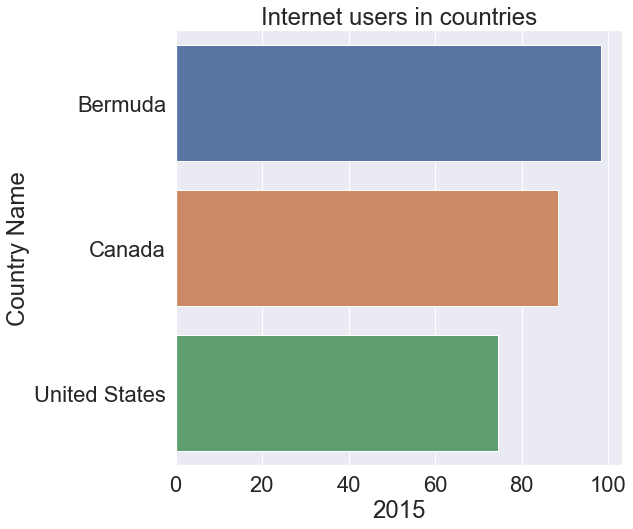

<Figure size 432x288 with 0 Axes>

In [85]:
sns.set(font_scale=2)
plt.figure(figsize=(8, 8))
sns.barplot(data=data_north_america, y="Country Name", x="2015")
plt.title("Internet users in countries")
plt.show()
plt.savefig('bar_internetusers_countries.png')

# Conclusion 

We analysed this dataset considering the indicator internet usage. Our final region was North America and after doing that 
we found out that Bermuda has the most internet users in the region. 
